# Machine Learning - Random Forest (Floresta Aleatória)

#### Importação das bibliotecas necessárias

In [1]:
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Carregando a base de dados.

In [2]:
df_edu=pd.read_csv(r'C:\Users\Daniel\random-forest-materiais-apoio\random-forest-materiais-apoio\xAPI-Edu-Data.csv')
df_edu.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


#### Verificando as distribuições de classes.

In [3]:
df_edu['Class'].value_counts()

M    211
H    142
L    127
Name: Class, dtype: int64

#### Verificando os registros nulos

In [4]:
df_edu.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

#### Codificando os atributos numéricos.

In [5]:
Features=df_edu
cat_columns=Features.dtypes.pipe(lambda Features:Features[Features=='object']).index
for col in cat_columns:
    label=LabelEncoder()
    Features[col]=label.fit_transform(Features[col])

In [6]:
Features.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,15,16,2,20,1,1,1,2
1,1,4,4,2,1,0,7,0,0,20,20,3,25,1,1,1,2
2,1,4,4,2,1,0,7,0,0,10,7,0,30,0,0,0,1
3,1,4,4,2,1,0,7,0,0,30,25,5,35,0,0,0,1
4,1,4,4,2,1,0,7,0,0,40,50,12,50,0,0,0,2


#### Dividindo os dados em treino e teste

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test=train_test_split(df_edu.drop('Class',axis=1),df_edu['Class'],test_size=0.3,random_state=0)

#### Verificando a forma dos dados

In [9]:
X_train.shape,X_test.shape

((336, 16), (144, 16))

In [10]:
y_train.shape,y_test.shape

((336,), (144,))

#### Instânciando o objeto classificador

In [11]:
random_clf=RandomForestClassifier()

#### Parâmetros do  objeto RandomForestClassifier
* <span style="color:red">n_estimators: número de árvores que serão criadas na floresta.</span>
* <span style="color:red"> bootstrap: se será considerado o bootstrap dataset durante a criação das árvores.</span>
* <span style="color:red"> max_features: número total de features que as árvores serão criadas.</span>
* criterion: medida de qualidade da divisão.
* splitter: estratégia utilizada para dividir o nó de decisão.
* max_depth: profundidade máxima da árvore.
* min_samples_split: número de amostras mínimas para considerar um nó para divisão.
* min_samples_leaf: número de amostras mínimas no nível folha.

#### Treinando o modelo Random Forest

In [12]:
random_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### Predizendo as classes a partir do modelo treinado utilizando o conjunto de teste

In [13]:
resultado=random_clf.predict(X_test)
resultado

array([2, 1, 1, 2, 2, 2, 0, 1, 1, 1, 0, 2, 0, 1, 2, 2, 0, 1, 1, 0, 1, 0,
       2, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2, 1, 0, 0,
       2, 2, 0, 2, 1, 2, 2, 2, 0, 1, 0, 2, 1, 1, 2, 2, 2, 2, 0, 0, 0, 2,
       1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 2, 2, 1, 1, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 2, 1, 0, 1, 2, 1, 0, 2, 1, 2, 0, 1, 0, 1, 2,
       1, 2, 1, 1, 0, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0])

#### Métricas de Validação

In [14]:
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69        39
           1       0.82      0.94      0.88        34
           2       0.79      0.73      0.76        71

    accuracy                           0.77       144
   macro avg       0.77      0.79      0.78       144
weighted avg       0.77      0.77      0.77       144



#### Verificando as features mais importantes para o modelo treinado

In [18]:
random_clf.feature_importances_

array([0.02470115, 0.03619921, 0.03588422, 0.01625146, 0.03202334,
       0.02420804, 0.0390061 , 0.01184193, 0.05063861, 0.1555754 ,
       0.17822743, 0.11935804, 0.08992255, 0.03434358, 0.02182702,
       0.12999193])

In [20]:
feature_imp=pd.Series(random_clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)

In [21]:
feature_imp

VisITedResources            0.178227
raisedhands                 0.155575
StudentAbsenceDays          0.129992
AnnouncementsView           0.119358
Discussion                  0.089923
Relation                    0.050639
Topic                       0.039006
NationalITy                 0.036199
PlaceofBirth                0.035884
ParentAnsweringSurvey       0.034344
GradeID                     0.032023
gender                      0.024701
SectionID                   0.024208
ParentschoolSatisfaction    0.021827
StageID                     0.016251
Semester                    0.011842
dtype: float64

#### Features mais importantes de forma gráfica

In [36]:
%matplotlib inline
def visualiza_features_importantes(features_lista):
    plt.figure(figsize=(16,10))
    sns.barplot(x=features_lista,y=features_lista.index)
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title('Importance of the Features')
    plt.show()    

<IPython.core.display.Javascript object>


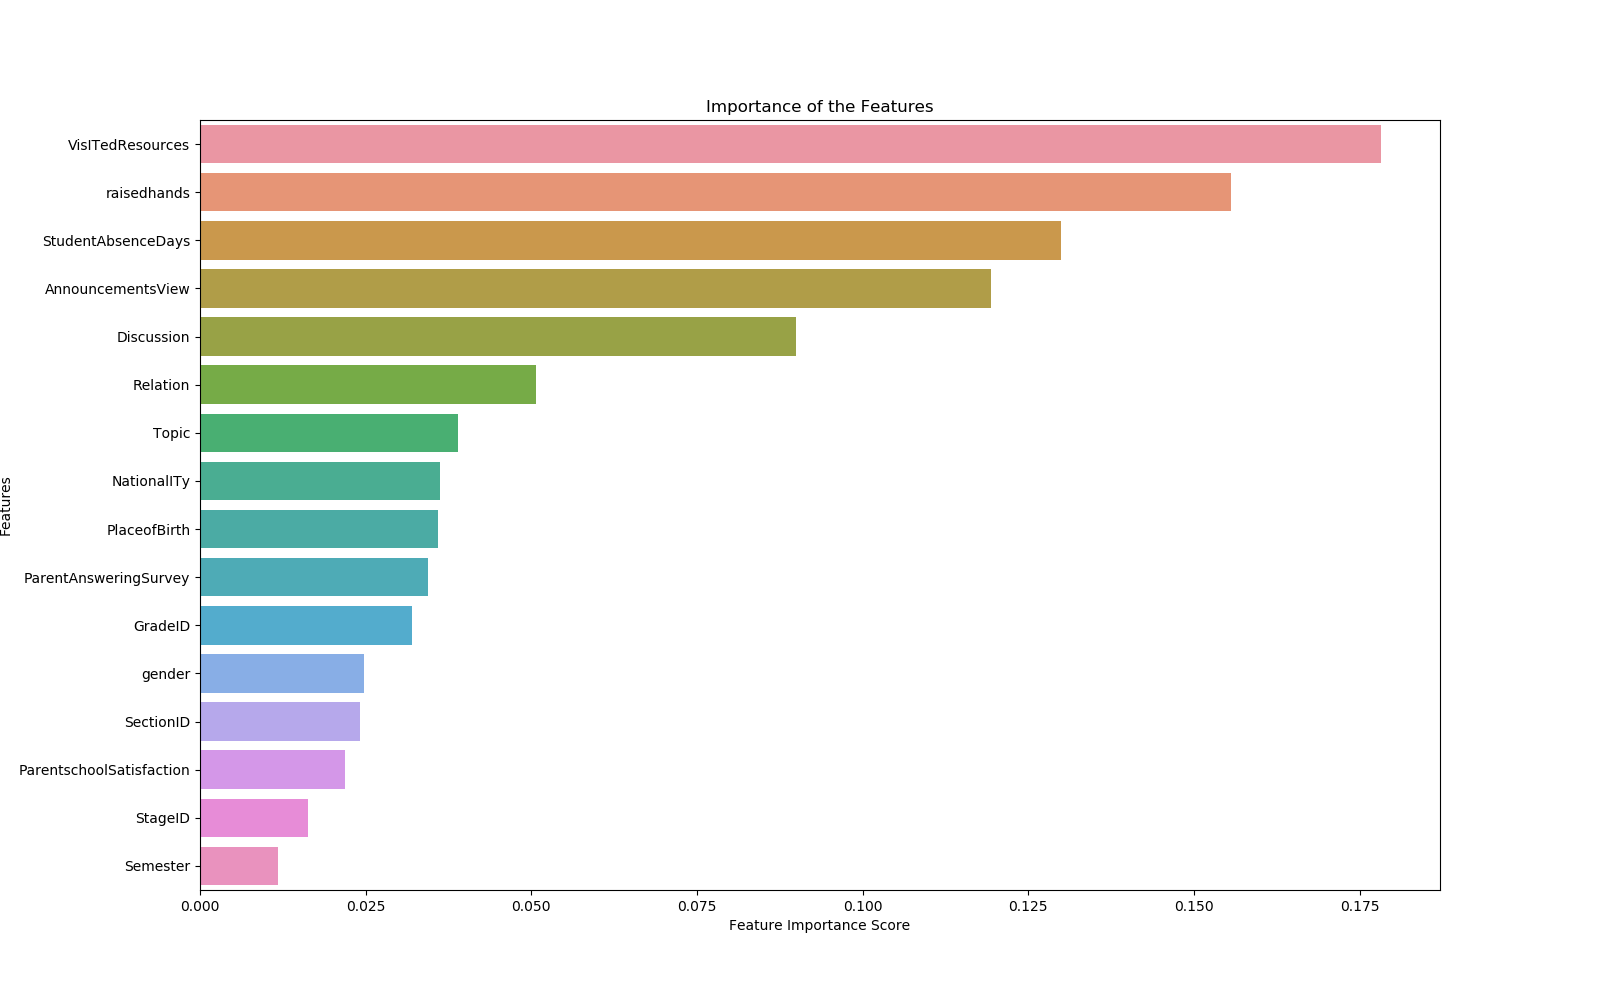

In [35]:
visualiza_features_importantes(feature_imp)

 Selecionando apenas as features com importancia acima de um determinado score.

In [37]:
features_importancia=[]
for features,importancia in feature_imp.iteritems():
    if importancia>0.03:
        print('{}:{}'.format(features,importancia))
        features_importancia.append(features)

VisITedResources:0.17822743359843685
raisedhands:0.15557540201317377
StudentAbsenceDays:0.12999193047210128
AnnouncementsView:0.11935803609827329
Discussion:0.08992255383067431
Relation:0.0506386071230174
Topic:0.03900609775176092
NationalITy:0.036199211265403125
PlaceofBirth:0.03588422324821056
ParentAnsweringSurvey:0.0343435755709294
GradeID:0.03202333615322482


#### Separando os dados em treino e teste utilizando apenas as features selecionadas

In [38]:
X_train,X_test,y_train,y_test=train_test_split(df_edu[features_importancia],df_edu['Class'],test_size=0.3,random_state=0)

#### Verificando a nova forma dos dados

In [40]:
X_train.shape,X_test.shape

((336, 11), (144, 11))

In [41]:
y_train.shape,y_test.shape

((336,), (144,))

#### Instânciando o objeto classificador

In [61]:
random_clf=RandomForestClassifier()

#### Treinando novamente o modelo Random Forest

In [62]:
random_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### Executando o algoritmo de arvore de decisão com o conjunto de teste

In [63]:
resultado=random_clf.predict(X_test)
resultado

array([2, 1, 1, 1, 2, 2, 0, 1, 1, 1, 0, 2, 0, 1, 2, 0, 0, 1, 1, 0, 1, 0,
       2, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2, 1, 0, 0,
       2, 2, 0, 2, 1, 2, 2, 2, 0, 1, 0, 2, 1, 1, 2, 2, 2, 2, 0, 0, 0, 2,
       1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 2, 2, 1, 1, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 2, 1, 0, 1, 0, 1, 2, 2, 1, 2, 0, 1, 0, 1, 2,
       1, 1, 1, 1, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 1,
       0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0])

#### Métricas de Validação

In [64]:
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74        39
           1       0.80      0.94      0.86        34
           2       0.82      0.72      0.77        71

    accuracy                           0.78       144
   macro avg       0.78      0.81      0.79       144
weighted avg       0.79      0.78      0.78       144



## Explorando as árvores da Floresta gerada

#### Selecionando uma árvore da floresta

#### Visualizando de forma gráfica

#### Selecionando outra árvore da floresta

#### Visualizando de forma gráfica